# Introduction:

### Section 1: Effects of Guided Learning Duration and Attempts

This section analyzes the correlation between average duration and average attempts seperately on final grades, quiz grades, and midterm grades.

### Section 2: Effects of Class Structure

This section groups students by class structure (face to face with quiz, face to face with midterm, and online). The
students are also bucketed into letter grades that correspond to the numbers 0,1,2,3,4.

### Section 3: Looking at the "Dip"

This section will plot grades of students over the course of the semester. The grades of interest are project grades
and guided learning grades. Quiz grades will also be looked at for the face to face quiz group.


In [8]:
"""
Import libraries
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pendulum
import datetime
from scipy import stats

In [9]:
"""
Import Data
"""
#Assessment Page Views
page_views = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Assessment Page Views Fall 2018 Clean.csv', nrows = 10000, index_col = 0)
#Final Grade Export
grades = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/KSU Student Final Grades 2018 Anonymous.csv', index_col = 0)
#detailed grades for face to face using quizzes
grades_f2f_quiz = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/grades detailed/Course Grades (Detail View) Fall 2018.xlsx - F2F Quizzes.csv', index_col = 0)
#detailed grades for online
grades_online = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/grades detailed/Course Grades (Detail View) Fall 2018.xlsx - Online.csv', index_col = 0)
#detailed grades for face to face using a midterm
grades_f2f_midterm = pd.read_csv('/Users/ethanrowe/Dev/springboard_data/grades detailed/Course Grades (Detail View) Fall 2018.xlsx - F2F Tests.csv', index_col = 0)


****
## Section 1: Effects of Guided Learning Duration and Attempts

This section will look at the correlation between average duration and attempts on guided learning and grade outcomes: final grades, quiz grades, and midterms.

I will use simple linear regressions to test for correlations and hypothesis tests to evaluate the difference between groups (Those above versus below the average for duration and attempts).

In [10]:
page_views.head(2)

,assessment_attempt_id,assessment_type,canvas_assignment_id,canvas_course_id,canvas_section_id,created_at,duration,id,load_time,page_id,raw_lti_param_ext_outcome_submission_submitted_at_accepted,submit_time,user_param_external_user_id
0,289769,MentalHealthChapterAssessment,42549.0,640,1193.0,2018-11-09 10:37:31 UTC,1277.0,6475582,2018-11-09 10:37:37 UTC,76,True,2018-11-09 10:37:39 UTC,38922
1,286863,KsuStressChapterAssessment,41440.0,641,1196.0,2018-11-09 10:38:07 UTC,2720.0,6475589,2018-11-09 10:38:03 UTC,50,True,2018-11-09 10:38:06 UTC,37374


In [11]:
"""
Create dataframe grouped by assessment_type and average duration
"""
type_avg_duration = pd.DataFrame(page_views.groupby(['assessment_type'])['duration'].mean())
type_avg_duration = type_avg_duration.reset_index()
type_avg_duration.columns = ['assessment_type', 'avg_duration']
type_avg_duration.head()

,assessment_type,avg_duration
0,BehaviorChangeChapterAssessment,5957.079470
1,BodyMassIndexAssessment,6224.692308
2,CalorieBmrAssessment,7815.461538
3,CurlUpAssessment,9241.600000
4,FamilyHistoryAssessment,25365.000000


In [12]:
"""
First, create the necessary dataframes to describe the students
"""

'\nFirst, create the necessary dataframes to describe the students\n'

In [13]:
#Calculate the average for each assignment
student_avg_duration = pd.DataFrame(page_views.groupby(['user_param_external_user_id','assessment_type'])['duration'].mean())
student_avg_duration = student_avg_duration.reset_index()
student_avg_duration.columns = ['user_param_external_user_id','assessment_type', 'avg_duration']
student_avg_duration.head()



,user_param_external_user_id,assessment_type,avg_duration
0,2168,KsuNutritionChapterAssessment,2833.333333
1,2168,KsuStressChapterAssessment,271.000000
2,2886,KsuWeightManagementChapterAssessment,15274.000000
3,2899,SyllabusGeneralChapterAssessment,2890.500000
4,3562,BehaviorChangeChapterAssessment,2675.500000


In [14]:
#Use the assignment average that to get the average for each student
student_avg_duration_all = pd.DataFrame(page_views.groupby(['user_param_external_user_id'])['duration'].mean())
student_avg_duration_all = student_avg_duration_all.reset_index()
student_avg_duration_all.columns = ['user_param_external_user_id', 'avg_duration']
student_avg_duration_all.head()

,user_param_external_user_id,avg_duration
0,2168,1808.4
1,2886,15274.0
2,2899,2890.5
3,3562,5685.8
4,3892,559.4


In [15]:
#Now, find the number of attempts for each assignment
student_attempt_count = pd.DataFrame(page_views.groupby(['user_param_external_user_id','assessment_type'])['assessment_attempt_id'].count())
student_attempt_count = student_attempt_count.reset_index()
student_attempt_count.columns = ['user_param_external_user_id','assessment_type', 'attempt_count']
student_attempt_count.head()


,user_param_external_user_id,assessment_type,attempt_count
0,2168,KsuNutritionChapterAssessment,3
1,2168,KsuStressChapterAssessment,2
2,2886,KsuWeightManagementChapterAssessment,1
3,2899,SyllabusGeneralChapterAssessment,2
4,3562,BehaviorChangeChapterAssessment,6


In [16]:
#Use the above dataframe to calculate the average number of attempts for each student
student_avg_attempt = pd.DataFrame(student_attempt_count.groupby(['user_param_external_user_id'])['attempt_count'].mean())
student_avg_attempt = student_avg_attempt.reset_index()
student_avg_attempt.columns = ['user_param_external_user_id','avg_attempts']
print(student_avg_attempt.shape)
student_avg_attempt.head()



(1301, 2)


,user_param_external_user_id,avg_attempts
0,2168,2.5
1,2886,1.0
2,2899,2.0
3,3562,5.0
4,3892,5.0


In [17]:
"""
First test for correlation between attempts on guided learning and final grade in the course using linear regression.
"""

'\nFirst test for correlation between attempts on guided learning and final grade in the course using linear regression.\n'

In [18]:
grades.shape

(3156, 16)

In [19]:
#Merge with grades dataframe, so that we have access to 'unposted final score'
final_grades_by_attempts = pd.merge(student_avg_attempt, grades, left_on = ['user_param_external_user_id'], right_on = ['student id'], how = 'inner')

print(final_grades_by_attempts.shape)
final_grades_by_attempts.head(2)


(1312, 18)


,user_param_external_user_id,avg_attempts,student id,student sis,course,course id,course sis,section,section id,section sis,term,term id,term sis,current score,final score,enrollment state,unposted current score,unposted final score
0,2168,2.5,2168,NaN,WELL1000 Foundations for Healthy Living - Onli...,637,NaN,WELL 1000/W70,1187,NaN,Fall 2018,20,NaN,53.57,51.19,active,53.57,51.19
1,2886,1.0,2886,NaN,WELL1000 Foundations for Healthy Living - Mart...,645,NaN,WELL1000/20,1203,NaN,Fall 2018,20,NaN,82.69,82.69,active,82.69,82.69


In [20]:
#Define x and y for linear regression
x = final_grades_by_attempts['avg_attempts']
y = final_grades_by_attempts['unposted final score']

In [21]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [22]:
print(slope, intercept, r_value, p_value, std_err)

-0.026845710656406153 85.07442693281664 -0.007142270992525314 0.7960513231213778 0.10384649803341589


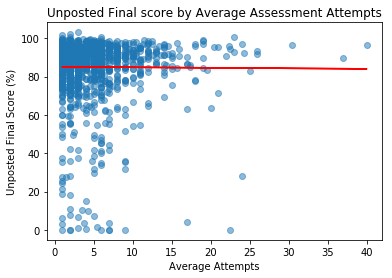

In [23]:
_ = plt.scatter(x, y, alpha = 0.5)
_ = plt.plot(x, intercept + slope * x, color = 'red')
_ = plt.title('Unposted Final score by Average Assessment Attempts')
_ = plt.xlabel('Average Attempts')
_ = plt.ylabel('Unposted Final Score (%)')
#plt.show()
_ = plt.savefig('figures/Unposted Final score by Average Assessment Attempts.png')

In [24]:
"""
RESULTS:
According to cells 84 and 109, there is not a correlation between unposted final score e.g the final grade in the 
class and the average number of attempts the students took their assessments.
"""

'\nRESULTS:\nAccording to cells 84 and 109, there is not a correlation between unposted final score e.g the final grade in the \nclass and the average number of attempts the students took their assessments.\n'

In [25]:
"""
Correlation between duration and grade

 - First bucket the students in above and below the average duration.

 - Then get grade distributions for each. 

 - Use hypothesis test to get a difference of means.

 - Perform a linear regression.
 """

'\nCorrelation between duration and grade\n\n - First bucket the students in above and below the average duration.\n\n - Then get grade distributions for each. \n\n - Use hypothesis test to get a difference of means.\n\n - Perform a linear regression.\n '

In [26]:
student_avg_duration.head()

,user_param_external_user_id,assessment_type,avg_duration
0,2168,KsuNutritionChapterAssessment,2833.333333
1,2168,KsuStressChapterAssessment,271.000000
2,2886,KsuWeightManagementChapterAssessment,15274.000000
3,2899,SyllabusGeneralChapterAssessment,2890.500000
4,3562,BehaviorChangeChapterAssessment,2675.500000


In [27]:
student_avg_duration_all.head()

,user_param_external_user_id,avg_duration
0,2168,1808.4
1,2886,15274.0
2,2899,2890.5
3,3562,5685.8
4,3892,559.4


In [28]:
#merge in grades column
final_grades_by_duration = pd.merge(student_avg_duration_all, grades, left_on = ['user_param_external_user_id'], right_on = ['student id'], how = 'inner')



In [29]:
#The average duration for all students
average_duration = final_grades_by_duration.avg_duration.mean()
above_avg_duration = final_grades_by_duration[final_grades_by_duration.avg_duration >= average_duration]
below_avg_duration = final_grades_by_duration[final_grades_by_duration.avg_duration < average_duration ]

In [30]:
print(above_avg_duration.head(2))
print(below_avg_duration.head(2))

   user_param_external_user_id  avg_duration  student id  student sis  \
1                         2886       15274.0        2886          NaN   
5                         6958       11338.0        6958          NaN   

                                              course  course id  course sis  \
1  WELL1000 Foundations for Healthy Living - Mart...        645         NaN   
5  WELL1000 Foundations for Healthy Living - Onli...        638         NaN   

         section  section id  section sis       term  term id  term sis  \
1    WELL1000/20        1203          NaN  Fall 2018       20       NaN   
5  WELL 1000/W75        1190          NaN  Fall 2018       20       NaN   

   current score  final score enrollment state  unposted current score  \
1          82.69        82.69           active                   82.69   
5          39.01        37.25           active                   39.01   

   unposted final score  
1                 82.69  
5                 37.25  
   user_param_e

Mean Final Score:  85.54768361581927


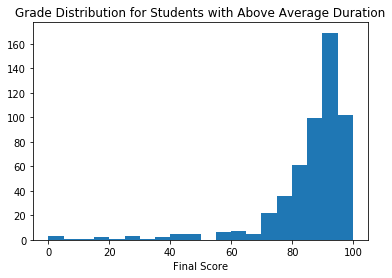

In [31]:
_ = plt.hist(x = above_avg_duration['unposted final score'], bins = 20)
_ = plt.title('Grade Distribution for Students with Above Average Duration')
_ = plt.xlabel('Final Score')
_ = plt.savefig('figures/Grade Distribution for Students with Above Average Duration.png')
print('Mean Final Score: ', above_avg_duration['unposted final score'].mean())

Mean Final Score:  84.54563380281681


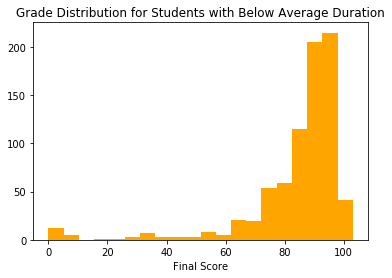

In [32]:
_ = plt.hist(x = below_avg_duration['unposted final score'], bins = 20, color = 'orange')
_ = plt.title('Grade Distribution for Students with Below Average Duration')
_ = plt.xlabel('Final Score')
_ = plt.savefig('figures/Grade Distribution for Students with Below Average Duration.png')
print('Mean Final Score: ',below_avg_duration['unposted final score'].mean())

In [33]:
"""
T-test for difference of means with confidence interval and margin of error.
"""
stat, p = stats.ttest_ind(above_avg_duration['unposted final score'], below_avg_duration['unposted final score'])
print("p = ", p)

p =  0.2782323837362156


In [34]:
#Confidence Interval for the difference of means
empirical_diff = above_avg_duration['unposted final score'].subtract(below_avg_duration['unposted final score'], fill_value=0)
conf_int = np.percentile(empirical_diff, [2.5, 97.5])
print('95% confidence interval =', conf_int)


95% confidence interval = [-98.15025  97.29225]


In [35]:
#Margin of error
prob = 0.95
df = len(empirical_diff) - 1
sem = np.std(empirical_diff) / np.sqrt(len(empirical_diff))
value = stats.t.ppf(prob, df)
me = value * sem
print('Margin of Error', np.abs(me)*100, '%')

Margin of Error 386.65681657436465 %


In [36]:
"""
RESULT:
The hypothesis test could not reject the null hypothesis. This support for the notion that the two grade distribution 
have the same mean. This is compounded with an incredibly wide confidence interval with a huge margin of error.
"""

'\nRESULT:\nThe hypothesis test could not reject the null hypothesis. This support for the notion that the two grade distribution \nhave the same mean. This is compounded with an incredibly wide confidence interval with a huge margin of error.\n'

In [37]:
"""
Linear Regression
"""
x = final_grades_by_duration['avg_duration']
y = final_grades_by_duration['unposted final score']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

4.087913570621825e-05 84.68520308835511 0.012908543110558985 0.6403989215909673 8.74888365860784e-05


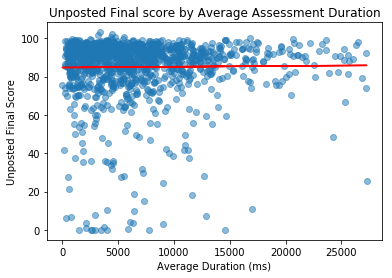

In [38]:
_ = plt.scatter(x, y,alpha = 0.5)
_ = plt.plot(x, intercept + slope * x, color = 'red')
_ = plt.title('Unposted Final score by Average Assessment Duration')
_ = plt.xlabel('Average Duration (ms)')
_ = plt.ylabel('Unposted Final Score')
_ = plt.savefig('figures/Unposted Final score by Average Assessment Duration.png')

In [39]:
"""
RESULT:
According to cells 102 and 108, their is not a correlation between unposted final score e.g the final grade in the 
class and the average duration in milliseconds the students took their assessments.
"""

'\nRESULT:\nAccording to cells 102 and 108, their is not a correlation between unposted final score e.g the final grade in the \nclass and the average duration in milliseconds the students took their assessments.\n'

In [40]:
"""

Note:

The next two regressions seperate students based on what class structure they had.

The first will use grades_f2f_quiz and then next will look at grades_f2f_midterm

This overlaps with the ideas in Section 2: Effects of Class Structure a little, but these regressions focus
on the effect of attempts and duration, not on class structure. These two regressions can not be done on the whole
data set since they grade entries for each student are not of the same exact form.

"""

'\n\nNote:\n\nThe next two regressions seperate students based on what class structure they had.\n\nThe first will use grades_f2f_quiz and then next will look at grades_f2f_midterm\n\nThis overlaps with the ideas in Section 2: Effects of Class Structure a little, but these regressions focus\non the effect of attempts and duration, not on class structure. These two regressions can not be done on the whole\ndata set since they grade entries for each student are not of the same exact form.\n\n'

In [41]:
"""
Linear regression of average duration and attempts on average Quiz grade
"""

'\nLinear regression of average duration and attempts on average Quiz grade\n'

In [42]:
grades_f2f_quiz['avg_quiz_grade'] = grades_f2f_quiz.loc[:, 'Quiz 1: Chapter 1-3':'  Quiz 6: Chapter 14'].sum(axis = 1)/6.0

In [43]:
quiz_grades_by_attempts = pd.merge(student_avg_attempt, grades_f2f_quiz, left_on = ['user_param_external_user_id'], right_on = ['User_param_external_user_id'], how = 'inner')
quiz_grades_by_duration = pd.merge(student_avg_duration_all, grades_f2f_quiz, left_on = ['user_param_external_user_id'], right_on = ['User_param_external_user_id'], how = 'inner')

In [44]:
x = quiz_grades_by_duration['avg_duration']
y = quiz_grades_by_duration['avg_quiz_grade']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

3.270125000592108e-05 28.971850967303727 0.027493096290986077 0.5113090163338656 4.975748828339579e-05


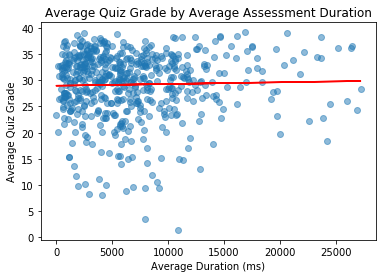

In [45]:
_ = plt.scatter(x, y, alpha = 0.5)
_ = plt.plot(x, intercept + slope * x, color = 'red')
_ = plt.title('Average Quiz Grade by Average Assessment Duration')
_ = plt.xlabel('Average Duration (ms)')
_ = plt.ylabel('Average Quiz Grade')
_ = plt.savefig('figures/Average Quiz Grade by Average Assessment Duration.png')

In [46]:
x = quiz_grades_by_attempts['avg_attempts']
y = quiz_grades_by_attempts['avg_quiz_grade']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

-0.05624356596602214 29.44518607228267 -0.03769401773073497 0.3677759140702348 0.0623984228507943


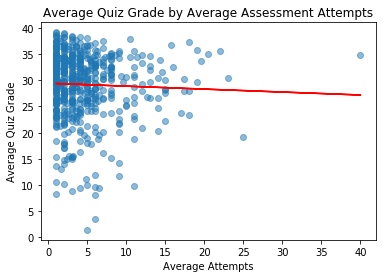

In [47]:
_ = plt.scatter(x, y, alpha = 0.5)
_ = plt.plot(x, intercept + slope * x, color = 'red')
_ = plt.title('Average Quiz Grade by Average Assessment Attempts')
_ = plt.xlabel('Average Attempts')
_ = plt.ylabel('Average Quiz Grade')
_ = plt.savefig('figures/Average Quiz Grade by Average Assessment Attempts.png')

In [48]:
"""
RESULTS:

Neither of these two linear regressions yielded any correlation. All p-values were too large to be considered 
signifcant, the r-values were two close to zero, and the slopes were too close to zero.
"""

'\nRESULTS:\n\nNeither of these two linear regressions yielded any correlation. All p-values were too large to be considered \nsignifcant, the r-values were two close to zero, and the slopes were too close to zero.\n'

In [49]:
"""
Linear regression of average duration and attempts on midterm grade
"""

'\nLinear regression of average duration and attempts on midterm grade\n'

In [50]:
midterm_grades_by_attempts = pd.merge(student_avg_attempt, grades_f2f_midterm, left_on = ['user_param_external_user_id'], right_on = ['User_param_external_user_id'], how = 'inner')
midterm_grades_by_duration = pd.merge(student_avg_duration_all, grades_f2f_midterm, left_on = ['user_param_external_user_id'], right_on = ['User_param_external_user_id'], how = 'inner')

In [51]:
x = midterm_grades_by_duration['avg_duration']
y = midterm_grades_by_duration['MidTerm']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

0.00020044496187070224 81.51657616473484 0.06762707931884246 0.42390615319567215 0.0002499281138478368


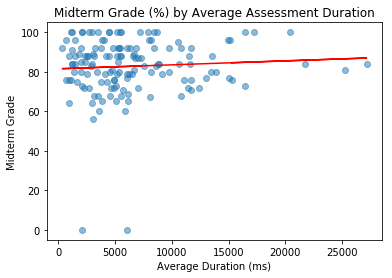

In [52]:
_ = plt.scatter(x, y, alpha = 0.5)
_ = plt.plot(x, intercept + slope * x, color = 'red')
_ = plt.title('Midterm Grade (%) by Average Assessment Duration')
_ = plt.xlabel('Average Duration (ms)')
_ = plt.ylabel('Midterm Grade')
_ = plt.savefig('figures/Midterm Grade (%) by Average Assessment Duration.png')

In [53]:
x = midterm_grades_by_attempts['avg_attempts']
y = midterm_grades_by_attempts['MidTerm']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

-0.38320540288037563 84.91305529252834 -0.15690406954921313 0.06221374520439227 0.20385462490514472


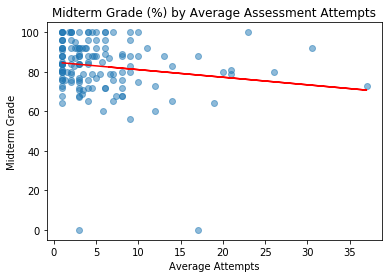

In [54]:
_ = plt.scatter(x, y, alpha = 0.5)
_ = plt.plot(x, intercept + slope * x, color = 'red')
_ = plt.title('Midterm Grade (%) by Average Assessment Attempts')
_ = plt.xlabel('Average Attempts')
_ = plt.ylabel('Midterm Grade')
_ = plt.savefig('figures/Midterm Grade (%) by Average Assessment Attempts.png')

In [55]:
"""
RESULTS:
Neither of these two linear regressions yielded any correlation. All p-values were too large to be considered 
signifcant, the r-values were too close to zero, or the slopes were too close to zero.
"""

'\nRESULTS:\nNeither of these two linear regressions yielded any correlation. All p-values were too large to be considered \nsignifcant, the r-values were too close to zero, or the slopes were too close to zero.\n'

In [56]:
"""
Linear regression of average duration and attempts on guided learning grades
"""

'\nLinear regression of average duration and attempts on guided learning grades\n'

In [57]:
student_avg_guided_learning = pd.DataFrame(detailed_grades.iloc[:, 6:20].sum(axis = 1)/len(detailed_grades.iloc[:, 6:20].columns))
student_avg_guided_learning.columns = ['avg_grade']
guided_learning_by_attempts = pd.merge(student_avg_attempt, student_avg_guided_learning, left_on = ['user_param_external_user_id'], right_on = ['User_param_external_user_id'], how = 'inner')
guided_learning_by_duration = pd.merge(student_avg_duration_all, student_avg_guided_learning, left_on = ['user_param_external_user_id'], right_on = ['User_param_external_user_id'], how = 'inner')


NameError: name 'detailed_grades' is not defined

In [58]:
x = guided_learning_by_duration['avg_duration']
y = guided_learning_by_duration['avg_grade']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

NameError: name 'guided_learning_by_duration' is not defined

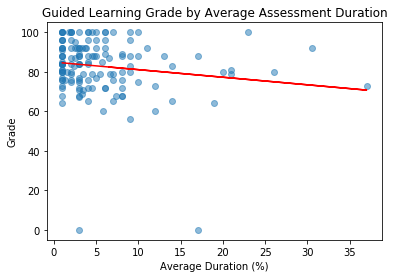

In [59]:
_ = plt.scatter(x, y, alpha = 0.5)
_ = plt.plot(x, intercept + slope * x, color = 'red')
_ = plt.title('Guided Learning Grade by Average Assessment Duration')
_ = plt.xlabel('Average Duration (%)')
_ = plt.ylabel('Grade')
_ = plt.savefig('figures/Guided Learning Grade by Average Assessment Duration.png')

In [60]:
x = guided_learning_by_attempts['avg_attempts']
y = guided_learning_by_attempts['avg_grade']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print(slope, intercept, r_value, p_value, std_err)

NameError: name 'guided_learning_by_attempts' is not defined

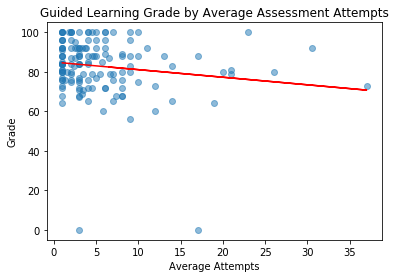

In [61]:
_ = plt.scatter(x, y, alpha = 0.5)
_ = plt.plot(x, intercept + slope * x, color = 'red')
_ = plt.title('Guided Learning Grade by Average Assessment Attempts')
_ = plt.xlabel('Average Attempts')
_ = plt.ylabel('Grade')
_ = plt.savefig('figures/Guided Learning Grade by Average Assessment Attempts.png')

In [62]:
"""
RESULTS:
No correlation for this section either.
"""

'\nRESULTS:\nNo correlation for this section either.\n'

## Results:

The linear regressions and hypothesis tests performed are as follows:
 * Unposted Final score and Average Assessment Attempts
 * Unposted Final score and Average Assessment Duration
 * Difference of means for Students with above versus below average assessment durations
 * Average Quiz Grade by Average Assessment Duration
 * Average Quiz Grade by Average Assessment Attempts
 * Average Midterm Grade by Average Assessment Duration
 * Average Midterm Grade by Average Assessment Attempts
 * Guided Learning Grade by Average Assessment Duration
 * Guided Learning Grade by Average Assessment Attempts

None of these yielded any correlation or difference of means. The conclusion is that none of these factors were
a direct contributor or indicator of student success in the course.

****
## Section 2: Effects of Class Structure

This section will divide students based on their final scores in the class. They will be bucketed into 5 groups: 105-90, 90 - 80, 80 - 70, 70 - 60, 60-0. The last group is larger, but it charcterizes all the students that got failing grades. It is a grouping essentially of A,B,C,D, and F letter grades.

Then students will be divided based on the class structure they took: face to face with quizzes (which includes the hybrid group), face to face with a midterm, and online.

Using these grouping, I will calculate descriptive statistics and perform hypothesis test to see if their are statisitaclly significant difference between the groups. This will be a basis for furhter analysis with machine learning.



In [63]:
"""
Concatenate the detailed grade dataframes and add a column to identify what the class structure is.
See description of dataframes at the beginning of the report.
grades_f2f_quiz
grades_f2f_midterm
grades_online 
"""
#Add column to identify class structure
grades_f2f_quiz['structure'] = 'quiz'
grades_f2f_midterm['structure'] = 'midterm'
grades_online['structure'] = 'online'

In [64]:
#Concatenate the dataframes

detailed_grades = pd.concat([grades_f2f_quiz, grades_f2f_midterm, grades_online], sort = True)
detailed_grades.head(2)

,Quiz 6: Chapter 14,Interactive Syllabus,Alcohol Assessment,Attendence,Body Mass Index (BMI) Assessment,Calorie Calculator Activity,Chapter 1 Guided Learning,Chapter 10 Guided Learning,Chapter 11 Guided Learning,Chapter 12 Guided Learning,...,Section,Self-Introduction Discussion,Sexual Health Assessment,Strength Assessment,Stress Assessment,Target Heart Rate Assessment,Total Points Earned,Waist Circumference Activity,avg_quiz_grade,structure
User_param_external_user_id,,,,,,,,,,,,,,,,,,,,,
39408,0.0,0.0,0.0,NaN,0,0,0.0,0.0,0.0,0,...,WELL 1000/37,NaN,0.0,6.0,0,5.0,188.6,0,3.266667,quiz
38171,40.0,10.0,0.0,NaN,0,0,5.0,0.0,0.0,0,...,WELL 1000/38,NaN,0.0,0.0,0,0.0,192.0,0,12.833333,quiz


In [65]:
"""
Bucket students into six groups by final score.
The 'grade_bucket' will return a column whose values are the index of the buckets array e.g
4: 60-0 F
3: 70-60 D
2: 80-70 C
1: 90-80 B
0: 105-90 A
"""

#for i in range(6):
    #detailed_grades['grade_bucket'] = (detailed_grades['Grade (%)'] < buckets[i][0]) & (detailed_grades['Grade (%)'] >= buckets[i][1])
    
def create_bucket(x):
    buckets = [[105, 90], [90,80], [80, 70], [70, 60],[60, 0]]
    for i in range(5):
        if (x < buckets[i][0]) & (x >= buckets[i][1]):
            return (i)
detailed_grades['grade_bucket'] = detailed_grades['Grade (%)'].apply(create_bucket)    
detailed_grades['grade_bucket'].head()
    

User_param_external_user_id
39408    4
38171    4
41858    4
37707    4
38718    4
Name: grade_bucket, dtype: int64

In [66]:
detailed_grades.head(2)

,Quiz 6: Chapter 14,Interactive Syllabus,Alcohol Assessment,Attendence,Body Mass Index (BMI) Assessment,Calorie Calculator Activity,Chapter 1 Guided Learning,Chapter 10 Guided Learning,Chapter 11 Guided Learning,Chapter 12 Guided Learning,...,Self-Introduction Discussion,Sexual Health Assessment,Strength Assessment,Stress Assessment,Target Heart Rate Assessment,Total Points Earned,Waist Circumference Activity,avg_quiz_grade,structure,grade_bucket
User_param_external_user_id,,,,,,,,,,,,,,,,,,,,,
39408,0.0,0.0,0.0,NaN,0,0,0.0,0.0,0.0,0,...,NaN,0.0,6.0,0,5.0,188.6,0,3.266667,quiz,4
38171,40.0,10.0,0.0,NaN,0,0,5.0,0.0,0.0,0,...,NaN,0.0,0.0,0,0.0,192.0,0,12.833333,quiz,4


In [67]:
"""
Final Grade Distributions by Class Structure
"""
#group
detailed_grades_quiz = detailed_grades[detailed_grades['structure'] == 'quiz']
detailed_grades_midterm = detailed_grades[detailed_grades['structure'] == 'midterm']
detailed_grades_online = detailed_grades[detailed_grades['structure'] == 'online']

Quiz:
 count    1298.000000
mean       85.698844
std        13.695829
min        20.280000
25%        81.295000
50%        90.155000
75%        94.687500
max       103.140000
Name: Grade (%), dtype: float64 
Midterm:
 count    371.000000
mean      83.492399
std       16.898238
min        1.080000
25%       78.900000
50%       89.540000
75%       94.150000
max      102.150000
Name: Grade (%), dtype: float64 
Online:
 count    1120.000000
mean       85.310518
std        14.112293
min        12.900000
25%        82.120000
50%        90.290000
75%        94.100000
max       101.280000
Name: Grade (%), dtype: float64


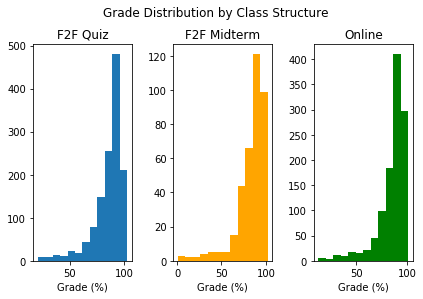

In [68]:
#plots using 'Grades (%)'
#These plot do not need to share a y axis because they are histograms (the y-axis is just a count)
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
_ = fig.tight_layout()
_ = fig.subplots_adjust(top = 0.85)
_ = fig.suptitle('Grade Distribution by Class Structure')
_ = plt.xlabel('Grade (%)')
_ = ax1.hist(x = detailed_grades_quiz['Grade (%)'], bins = 12)
_ = ax2.hist(x = detailed_grades_midterm['Grade (%)'], bins = 12, color = 'orange')
_ = ax3.hist(x = detailed_grades_online['Grade (%)'], bins = 12, color = 'green')
_ = ax1.set_title('F2F Quiz')
_ = ax1.set_xlabel('Grade (%)')
_ = ax2.set_title('F2F Midterm')
_ = ax2.set_xlabel('Grade (%)')
_ = ax3.set_title('Online')
_ = ax3.set_xlabel('Grade (%)')
_ = plt.savefig('figures/Grade Distribution by Class Structure.png')
print('Quiz:\n', detailed_grades_quiz['Grade (%)'].describe(), '\nMidterm:\n', detailed_grades_midterm['Grade (%)'].describe()
     ,'\nOnline:\n', detailed_grades_online['Grade (%)'].describe())


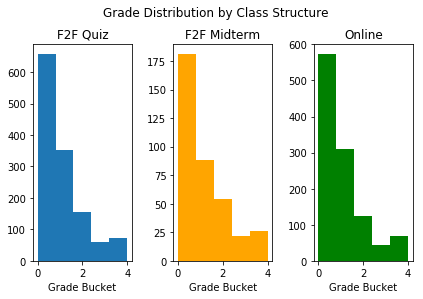

In [69]:
#plots using 'grade_bucket'
#These plot do not need to share a y axis because they are histograms (the y-axis is just a count)
#Refer to the scale above: 0 is an A and 4 is an F
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
_ = fig.tight_layout()
_ = fig.subplots_adjust(top = 0.85)
_ = fig.suptitle('Grade Distribution by Class Structure')
_ = plt.xlabel('Grade Bucket')
_ = ax1.hist(x = detailed_grades_quiz['grade_bucket'], bins = 5)
_ = ax2.hist(x = detailed_grades_midterm['grade_bucket'], bins = 5, color = 'orange')
_ = ax3.hist(x = detailed_grades_online['grade_bucket'], bins = 5, color = 'green')
_ = ax1.set_title('F2F Quiz')
_ = ax2.set_title('F2F Midterm')
_ = ax3.set_title('Online')
_ = ax1.set_xlabel('Grade Bucket')
_ = ax2.set_xlabel('Grade Bucket')
_ = ax3.set_xlabel('Grade Bucket')
_ = plt.savefig('figures/Grade Distribution by Class Structure (bucketed).png')

In [70]:
"""
RESULTS:
The distributions look very similar with slightly different descriptive statistics. Nothing that looks practially
or statistically significant.
"""

'\nRESULTS:\nThe distributions look very similar with slightly different descriptive statistics. Nothing that looks practially\nor statistically significant.\n'

In [71]:
"""
Hypothesis Tests (T-tests) to evaluate whether the means of the distributions are different. This will use Grade (%)
"""

'\nHypothesis Tests (T-tests) to evaluate whether the means of the distributions are different. This will use Grade (%)\n'

In [72]:
#T-test for difference of means. Null hypothesis: Quiz and Midterm class structures have the same mean final grade.
stat1, p1 = stats.ttest_ind(detailed_grades_quiz['Grade (%)'], detailed_grades_midterm['Grade (%)'])
print("p = ", p1)

p =  0.009667467365850804


In [73]:
#T-test for difference of means. Null hypothesis: Quiz and Online class structures have the same mean final grade
stat2, p2 = stats.ttest_ind(detailed_grades_quiz['Grade (%)'], detailed_grades_online['Grade (%)'])
print("p = ", p2)

p =  0.4930971665160936


In [74]:
#T-test for difference of means. Null hypothesis: Midterm and Online class structures have the same mean final grade
stat3, p3 = stats.ttest_ind(detailed_grades_midterm['Grade (%)'], detailed_grades_online['Grade (%)'])
print("p = ", p3)

p =  0.04118902171050326


In [75]:
"""
Hypothesis Tests (T-tests) to evaluate whether the means of the distributions are different. This will use grade_bucket
"""

'\nHypothesis Tests (T-tests) to evaluate whether the means of the distributions are different. This will use grade_bucket\n'

In [76]:
#T-test for difference of means. Null hypothesis: Quiz and Midterm class structures have the same mean final grade.
stat4, p4 = stats.ttest_ind(detailed_grades_quiz['grade_bucket'], detailed_grades_midterm['grade_bucket'])
print("p = ", p4)

p =  0.10648733057737642


In [77]:
#T-test for difference of means. Null hypothesis: Quiz and Online class structures have the same mean final grade
stat5, p5 = stats.ttest_ind(detailed_grades_quiz['grade_bucket'], detailed_grades_online['grade_bucket'])
print("p = ", p5)

p =  0.7730813674345433


In [78]:
#T-test for difference of means. Null hypothesis: Midterm and Online class structures have the same mean final grade
stat6, p6 = stats.ttest_ind(detailed_grades_midterm['grade_bucket'], detailed_grades_online['grade_bucket'])
print("p = ", p6)

p =  0.076092472567597


In [79]:
"""
RESULTS:
When using 'Grade (%)' which shows grade as a percentage, there were two p-values that looked significant: 
Quiz and Midterm class structures have the same mean final grade was rejected and
Midterm and Online class structures have the same mean final grade

This difference was significant at alpha = 0.01 and alpha = 0.042 respectivally. 
This does not tell if the difference is practially significant though.

When grouped by letter grade, the same hypothesis tests could not reject the null hypothesis that
Quiz and Midterm class structures have the same mean final grade. This likely means the difference was not practically
signifcant now that the students are bucketed.

Midterm and Online class structures have the same mean final grade was rejected at alpha = 0.077. This is means that
about 93% of values were less extreme than the test statistic which would be the difference of means here.

If there were the same it would be zero, but for this case it seems likely that it is not zero. This could be a point
to explore later with machine learning.
"""

"\nRESULTS:\nWhen using 'Grade (%)' which shows grade as a percentage, there were two p-values that looked significant: \nQuiz and Midterm class structures have the same mean final grade was rejected and\nMidterm and Online class structures have the same mean final grade\n\nThis difference was significant at alpha = 0.01 and alpha = 0.042 respectivally. \nThis does not tell if the difference is practially significant though.\n\nWhen grouped by letter grade, the same hypothesis tests could not reject the null hypothesis that\nQuiz and Midterm class structures have the same mean final grade. This likely means the difference was not practically\nsignifcant now that the students are bucketed.\n\nMidterm and Online class structures have the same mean final grade was rejected at alpha = 0.077. This is means that\nabout 93% of values were less extreme than the test statistic which would be the difference of means here.\n\nIf there were the same it would be zero, but for this case it seems lik

## Results:

The distributions and means appear to be the same for the different class structures. All of the grade distributions had a mean of about 83-85 which is not varied enough to be significant. None of the standard deviations or other descriptive statistics stood out either. None of the hypothesis tests were able to reject the null hypothesis for the difference of means between the grade distributions except for Midterm and Online class structures having the same mean final grade was rejected at alpha = 0.077. This was after bucketing to assign students to 6 categories of letter grades. 

It makes sense that the purely online class would have a different average final grade in the class compared to the face to face classes (quiz and midterm). It does stand out a little bit that Quiz and Online class structures having the same mean final grade had a p-value of 0.77308, but Quiz and Midterm grades only had a p-value of 0.1065 after bucketing. 

So although Midterm and Online have statistically different mean final grades, and their is a case for Midterm and Quiz having different means, Quiz and Online are most likely not different.

This is consistent with the descriptive statistics that were calculated were Quiz and Online students had a mean final score of 85 while Midterm students had a mean final score of 83.

This is statistically different, but maybe not practically significant. It is worth recognizing since they were also different after bucketing to account for small percentage gaps like above.

****
## Section 3: Looking at the "Dip"

This section will plot grades of students over the course of the semester. 
The grades of interest are project grades and guided learning grades. 
Quiz grades will also be looked at for the face to face quiz and online groups.
Students will be broken up by their class structure for some of the plots, then they will also be bucketed by their
final grade in the class.

Overall Plots:
 * Plot 1: Overall trend for Project Grades
 * Plot 2: Overall trend for Quiz Grades
 * Plot 3: Overall trend for Guided Learning Grades

Class Structure Plots:
 * Plot 4: Trend for project grades by Class structure
 * Plot 5: Trend for Guided Learning Grades by Class Structure 
 * Plot 6: Trend for Quiz grades by Class Structure

Final Grade Plots:
 * Plot 7: Trend for project grades by grade_bucket 
 * Plot 8: Trend for guided learning grades by grade_bucket 
 * Plot 9: Trend for quiz grades by grade_bucket

In [80]:
"""
Overall trends for grades: Projects, Quizzes, and Guided Learning
"""

'\nOverall trends for grades: Projects, Quizzes, and Guided Learning\n'

Module 1 Healthy Living Project    50.247938
Module 2 Healthy Living Project    16.261922
Module 3 Healthy Living Project    16.464862
Module 4 Healthy Living Project    16.225170
Module 5 Healthy Living Project    16.328792
Module 6 Healthy Living Project    49.795626
dtype: float64

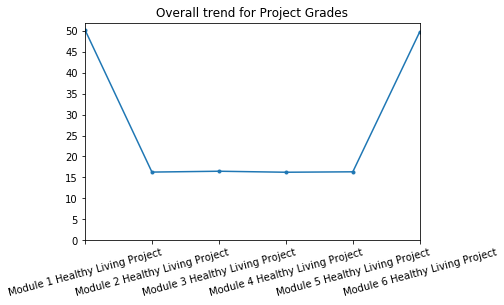

In [81]:
#Overall trend for project grades
project_grades = detailed_grades.iloc[:, 41:47].sum(axis = 0)/detailed_grades.shape[0]
yticks = [x for x in range(55) if x % 5 == 0]
_ = project_grades.plot(marker = '.', title = 'Overall trend for Project Grades', yticks = yticks)
_ = plt.xticks(rotation = 15)
_ = plt.savefig('figures/Overall trend for Project Grades.png')
project_grades

Chapter 1 Guided Learning     4.639118
Chapter 2 Guided Learning     4.570993
Chapter 3 Guided Learning     4.508964
Chapter 4 Guided Learning     4.261025
Chapter 5 Guided Learning     4.027608
Chapter 6 Guided Learning     4.180889
Chapter 7 Guided Learning     3.419864
Chapter 9 Guided Learning     4.305127
Chapter 10 Guided Learning    4.019900
Chapter 11 Guided Learning    4.360165
Chapter 14 Guided Learning    4.421836
dtype: float64

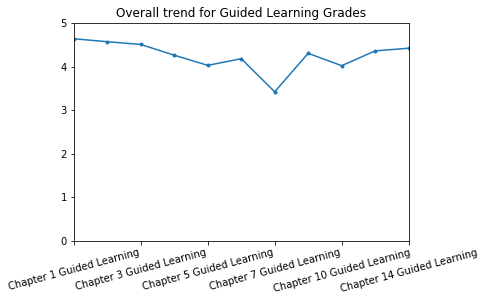

In [82]:
#Overall trend for guided learning grades
guided_learning_grades = detailed_grades.iloc[:, 6:20].sum()/detailed_grades.shape[0]
guided_learning_grades_sorted = pd.concat([guided_learning_grades[:1],guided_learning_grades[4:],guided_learning_grades[1:4]])
_ = guided_learning_grades_sorted.plot(marker = '.', title = 'Overall trend for Guided Learning Grades', yticks = range(6))
_ = plt.xticks(rotation = 15)
_ = plt.savefig('figures/Overall trend for Guided Learning Grades.png')
guided_learning_grades_sorted

Quiz 1: Chapter 1-3      31.463575
Quiz 2: Chapter 4-5      27.135010
Quiz 3: Chapter 6-8      27.332576
Quiz 4: Chapter 9-10     29.637920
Quiz 5: Chapter 11-13    25.694779
  Quiz 6: Chapter 14     29.299307
dtype: float64

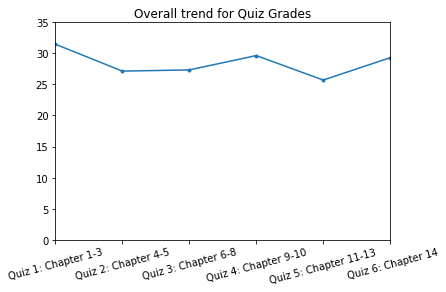

In [83]:
#Trend for Quiz Grades by Class Structure
quiz_grades = pd.merge(detailed_grades_quiz.iloc[:,56:61], detailed_grades_quiz.iloc[:, :1], on = ['User_param_external_user_id'])
quiz_grades = quiz_grades.sum()/quiz_grades.shape[0]
yticks = [x for x in range(40) if x % 5 == 0]
_ = quiz_grades.plot(marker = '.', title = 'Overall trend for Quiz Grades', yticks = yticks)
_ = plt.xticks(rotation = 15)
_ = plt.savefig('figures/Overall trend for Quiz Grades.png')
quiz_grades


In [84]:
"""
Grade trends by Class Structure: Projects, Guided Learning, and Quizzes
"""

'\nGrade trends by Class Structure: Projects, Guided Learning, and Quizzes\n'

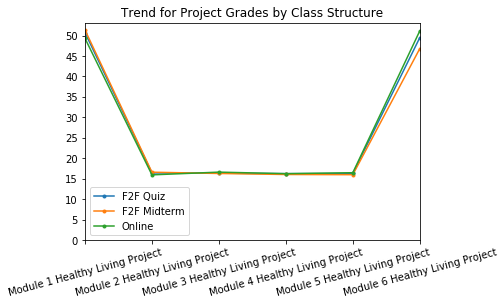

In [85]:
#Trend for project grades by Class structure
#Overall trend for project grades
project_grades_quiz = detailed_grades_quiz.iloc[:, 41:47].sum(axis = 0)/detailed_grades_quiz.shape[0]
project_grades_midterm = detailed_grades_midterm.iloc[:, 41:47].sum(axis = 0)/detailed_grades_midterm.shape[0]
project_grades_online = detailed_grades_online.iloc[:, 41:47].sum(axis = 0)/detailed_grades_online.shape[0]
yticks = [x for x in range(55) if x % 5 == 0]
_ = project_grades_quiz.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = project_grades_midterm.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = project_grades_online.plot(marker = '.', title = 'Trend for Project Grades by Class Structure', yticks = yticks)
_ = plt.xticks(rotation = 15)
_ = plt.legend(['F2F Quiz', 'F2F Midterm','Online'])
_ = plt.savefig('figures/Trend for Project Grades by Class Structure.png')

In [86]:
#Fix the datatypes from string to float for some of the columns and remove odd string values
detailed_grades_quiz_clean = detailed_grades_quiz[detailed_grades_quiz.iloc[:,9] != 'EX']
detailed_grades_quiz_clean = detailed_grades_quiz_clean[detailed_grades_quiz_clean.iloc[:,10] != 'EX']
detailed_grades_online_clean = detailed_grades_online[detailed_grades_online.iloc[:,18] != 'EX']

detailed_grades_quiz_clean.iloc[:,9] = detailed_grades_quiz_clean.iloc[:,9].apply(float)
detailed_grades_quiz_clean.iloc[:,10] = detailed_grades_quiz_clean.iloc[:,10].apply(float)
detailed_grades_online_clean.iloc[:,18] = detailed_grades_online_clean.iloc[:,18].apply(float)

/Users/ethanrowe/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [87]:
detailed_grades_online_clean.iloc[:,6:20].sum()

Chapter 1 Guided Learning     5340.0
Chapter 10 Guided Learning    4605.0
Chapter 11 Guided Learning    5040.0
Chapter 12 Guided Learning    4900.0
Chapter 13 Guided Learning    4790.0
Chapter 14 Guided Learning    5040.0
Chapter 2 Guided Learning     5235.0
Chapter 3 Guided Learning     5080.0
Chapter 4 Guided Learning     4860.0
Chapter 5 Guided Learning     4505.0
Chapter 6 Guided Learning     4900.0
Chapter 7 Guided Learning     3675.0
Chapter 8 Guided Learning     4450.0
Chapter 9 Guided Learning     5005.0
dtype: float64

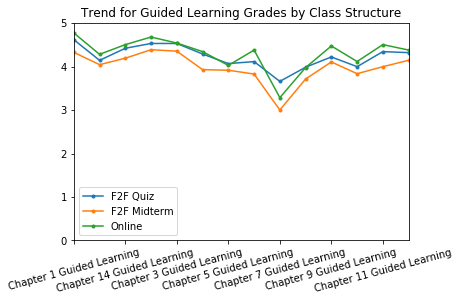

In [88]:
#Trend for guided learning grades by Class Structure
guided_learning_grades_quiz = detailed_grades_quiz_clean.iloc[:, 6:20].sum()/detailed_grades_quiz_clean.shape[0]
guided_learning_grades_quiz_sorted = pd.concat([guided_learning_grades_quiz[:1],guided_learning_grades_quiz[4:],guided_learning_grades_quiz[1:4]])

guided_learning_grades_midterm = detailed_grades_midterm.iloc[:, 6:20].sum()/detailed_grades_midterm.shape[0]
guided_learning_grades_midterm_sorted = pd.concat([guided_learning_grades_midterm[:1],guided_learning_grades_midterm[4:],guided_learning_grades_midterm[1:4]])

guided_learning_grades_online = detailed_grades_online_clean.iloc[:, 6:20].sum()/detailed_grades_online_clean.shape[0]
guided_learning_grades_online_sorted = pd.concat([guided_learning_grades_online[:1],guided_learning_grades_online[4:],guided_learning_grades_online[1:4]])

_ = guided_learning_grades_quiz_sorted.plot(marker = '.', title = 'Trend for guided learning grades by Class Structure', yticks = range(6))
_ = guided_learning_grades_midterm_sorted.plot(marker = '.', title = 'Trend for guided learning grades by Class Structure', yticks = range(6))
_ = guided_learning_grades_online_sorted.plot(marker = '.', title = 'Trend for Guided Learning Grades by Class Structure', yticks = range(6))
_ = plt.xticks(rotation = 15)
_ = plt.legend(['F2F Quiz','F2F Midterm','Online'])
_ = plt.savefig('figures/Trend for Guided Learning Grades by Class Structure.png')


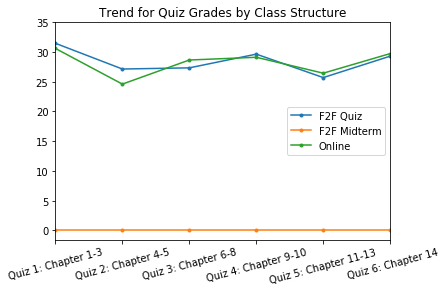

In [89]:
#Trend for Quiz by Class structure
guided_learning_grades_quiz = pd.merge(detailed_grades_quiz.iloc[:,56:61], detailed_grades_quiz.iloc[:, :1], on = ['User_param_external_user_id'])
guided_learning_grades_quiz = guided_learning_grades_quiz.sum()/guided_learning_grades_quiz.shape[0]

guided_learning_grades_midterm = pd.merge(detailed_grades_midterm.iloc[:,56:61], detailed_grades_midterm.iloc[:, :1], on = ['User_param_external_user_id'])
guided_learning_grades_midterm = guided_learning_grades_midterm.sum()/guided_learning_grades_midterm.shape[0]

guided_learning_grades_online = pd.merge(detailed_grades_online.iloc[:,56:61], detailed_grades_online.iloc[:, :1], on = ['User_param_external_user_id'])
guided_learning_grades_online = guided_learning_grades_online.sum()/guided_learning_grades_online.shape[0]

yticks = [x for x in range(40) if x % 5 == 0]
_ = guided_learning_grades_quiz.plot(marker = '.', title = 'Overall trend for Quiz grades', yticks = yticks)
_ = guided_learning_grades_midterm.plot(marker = '.', title = 'Overall trend for Quiz grades', yticks = yticks)
_ = guided_learning_grades_online.plot(marker = '.', title = 'Trend for Quiz Grades by Class Structure', yticks = yticks)
_ = plt.xticks(rotation = 15)
_ = plt.legend(['F2F Quiz', 'F2F Midterm', 'Online'])
_ = plt.savefig('figures/Trend for Quiz Grades by Class Structure.png')

In [90]:
"""
Grade trends by Student Final Letter Grade: Projects, Guided Learning, and Quizzes
"""

'\nGrade trends by Student Final Letter Grade: Projects, Guided Learning, and Quizzes\n'

In [91]:
#Seperate the dataframe by grade bucket
#Note: this must be run before running any of the following visualizations
detailed_grades_A = detailed_grades[detailed_grades['grade_bucket'] == 0]
detailed_grades_B = detailed_grades[detailed_grades['grade_bucket'] == 1]
detailed_grades_C = detailed_grades[detailed_grades['grade_bucket'] == 2]
detailed_grades_D = detailed_grades[detailed_grades['grade_bucket'] == 3]
detailed_grades_F = detailed_grades[detailed_grades['grade_bucket'] == 4]

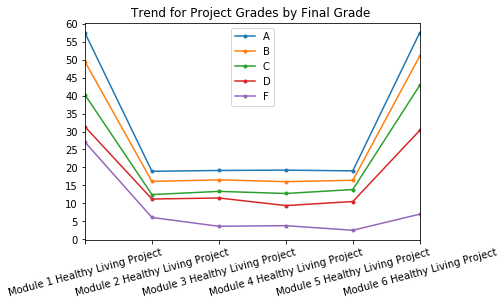

In [92]:
#Trend for guided learning grades by grade_bucket
project_grades_A = detailed_grades_A.iloc[:, 41:47].sum(axis = 0)/detailed_grades_A.shape[0]
project_grades_B = detailed_grades_B.iloc[:, 41:47].sum(axis = 0)/detailed_grades_B.shape[0]
project_grades_C = detailed_grades_C.iloc[:, 41:47].sum(axis = 0)/detailed_grades_C.shape[0]
project_grades_D = detailed_grades_D.iloc[:, 41:47].sum(axis = 0)/detailed_grades_D.shape[0]
project_grades_F = detailed_grades_F.iloc[:, 41:47].sum(axis = 0)/detailed_grades_F.shape[0]

yticks = [x for x in range(65) if x % 5 == 0]
_ = project_grades_A.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = project_grades_B.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = project_grades_C.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = project_grades_D.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = project_grades_F.plot(marker = '.', title = 'Trend for Project Grades by Final Grade ', yticks = yticks)
_ = plt.xticks(rotation = 15)
_ = plt.legend(['A', 'B','C', 'D', 'F'])
_ = plt.savefig('figures/Trend for Project Grades by Final Grade.png')

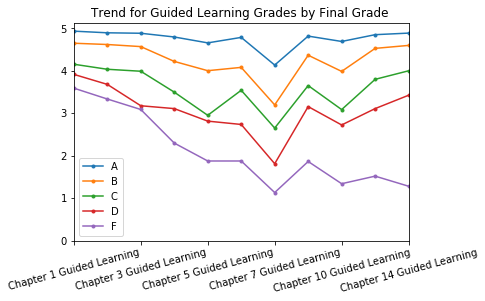

In [93]:
#Trend for guided learning grades by grade_bucket
guided_learning_grades_A = detailed_grades_A.iloc[:, 6:20].sum()/detailed_grades_A.shape[0]
guided_learning_grades_A = pd.concat([guided_learning_grades_A[:1],guided_learning_grades_A[4:],guided_learning_grades_A[1:4]])

guided_learning_grades_B = detailed_grades_B.iloc[:, 6:20].sum(axis = 0)/detailed_grades_B.shape[0]
guided_learning_grades_B = pd.concat([guided_learning_grades_B[:1],guided_learning_grades_B[4:],guided_learning_grades_B[1:4]])

guided_learning_grades_C = detailed_grades_C.iloc[:, 6:20].sum(axis = 0)/detailed_grades_C.shape[0]
guided_learning_grades_C = pd.concat([guided_learning_grades_C[:1],guided_learning_grades_C[4:],guided_learning_grades_C[1:4]])

guided_learning_grades_D = detailed_grades_D.iloc[:, 6:20].sum(axis = 0)/detailed_grades_D.shape[0]
guided_learning_grades_D = pd.concat([guided_learning_grades_D[:1],guided_learning_grades_D[4:],guided_learning_grades_D[1:4]])

guided_learning_grades_F = detailed_grades_F.iloc[:, 6:20].sum(axis = 0)/detailed_grades_F.shape[0]
guided_learning_grades_F = pd.concat([guided_learning_grades_F[:1],guided_learning_grades_F[4:],guided_learning_grades_F[1:4]])


yticks = [x for x in range(6)]
_ = guided_learning_grades_A.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = guided_learning_grades_B.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = guided_learning_grades_C.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = guided_learning_grades_D.plot(marker = '.', title = 'Trend for project grades', yticks = yticks)
_ = guided_learning_grades_F.plot(marker = '.', title = 'Trend for Guided Learning Grades by Final Grade ', yticks = yticks)
_ = plt.xticks(rotation = 15)
_ = plt.legend(['A', 'B','C', 'D', 'F'])
_ = plt.savefig('figures/Trend for Guided Learning Grades by Final Grade.png')

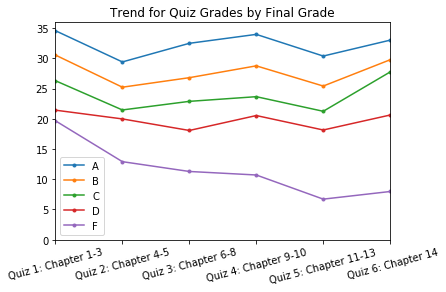

In [94]:
#Trend for quiz grades by grade_bucket
detailed_grades_A_quiz = detailed_grades[(detailed_grades['grade_bucket'] == 0) & ((detailed_grades['structure'] == 'quiz') | (detailed_grades['structure'] == 'online'))]
detailed_grades_B_quiz = detailed_grades[(detailed_grades['grade_bucket'] == 1) & ((detailed_grades['structure'] == 'quiz') | (detailed_grades['structure'] == 'online'))]
detailed_grades_C_quiz = detailed_grades[(detailed_grades['grade_bucket'] == 2) & ((detailed_grades['structure'] == 'quiz') | (detailed_grades['structure'] == 'online'))]
detailed_grades_D_quiz = detailed_grades[(detailed_grades['grade_bucket'] == 3) & ((detailed_grades['structure'] == 'quiz') | (detailed_grades['structure'] == 'online'))]
detailed_grades_F_quiz = detailed_grades[(detailed_grades['grade_bucket'] == 4) & ((detailed_grades['structure'] == 'quiz') | (detailed_grades['structure'] == 'online'))]

quiz_grades_A = pd.merge(detailed_grades_A_quiz.iloc[:,56:61], detailed_grades_A_quiz.iloc[:, :1], on = ['User_param_external_user_id'])
quiz_grades_A = quiz_grades_A.sum()/quiz_grades_A.shape[0]

quiz_grades_B = pd.merge(detailed_grades_B_quiz.iloc[:,56:61], detailed_grades_B_quiz.iloc[:, :1], on = ['User_param_external_user_id'])
quiz_grades_B = quiz_grades_B.sum()/quiz_grades_B.shape[0]

quiz_grades_C = pd.merge(detailed_grades_C_quiz.iloc[:,56:61], detailed_grades_C_quiz.iloc[:, :1], on = ['User_param_external_user_id'])
quiz_grades_C = quiz_grades_C.sum()/quiz_grades_C.shape[0]

quiz_grades_D = pd.merge(detailed_grades_D_quiz.iloc[:,56:61], detailed_grades_D_quiz.iloc[:, :1], on = ['User_param_external_user_id'])
quiz_grades_D = quiz_grades_D.sum()/quiz_grades_D.shape[0]

quiz_grades_F = pd.merge(detailed_grades_F_quiz.iloc[:,56:61], detailed_grades_F_quiz.iloc[:, :1], on = ['User_param_external_user_id'])
quiz_grades_F = quiz_grades_F.sum()/quiz_grades_F.shape[0]


yticks = [x for x in range(40) if x % 5 == 0]
_ = quiz_grades_A.plot(marker = '.', title = 'Overall trend for Quiz grades', yticks = yticks)
_ = quiz_grades_B.plot(marker = '.', title = 'Overall trend for Quiz grades', yticks = yticks)
_ = quiz_grades_C.plot(marker = '.', title = 'Trend for Quiz grades by Class Structure', yticks = yticks)
_ = quiz_grades_D.plot(marker = '.', title = 'Trend for Quiz grades by Class Structure', yticks = yticks)
_ = quiz_grades_F.plot(marker = '.', title = 'Trend for Quiz Grades by Final Grade', yticks = yticks)
_ = plt.xticks(rotation = 15)
_ = plt.legend(['A', 'B', 'C', 'D', 'F'])
_ = plt.savefig('figures/Trend for Quiz Grades by Final Grade.png')


## Results:

The graphs in this section explored the trend in grades for different class structures assignments, and final grades.
Nothing unexpected arose from these graphs. There was usually a dip in the middle of the semester and a rise at the end with students with lower final grades having lower average grades for the whole span of the semester.

This idea could possibly be used for identify at risk students early on and will be explored more in the capstone project.

****
# Conclusion:

Compilation of Section Results. This information can be found at the end of each section above.

### Section 1: Effects of Guided Learning Duration and Attempts Results:

None of the linear regressions involving duration or attempts yielded any correlation or difference of means. The conclusion is that none of these factors were a direct contributor or indicator of student success in the course.

### Section 2: Effects of Class Structure Results:

The distributions and means appear to be the same for the different class structures. All of the grade distributions had a mean of about 83-85 which is not varied enough to be significant. None of the standard deviations or other descriptive statistics stood out either. None of the hypothesis tests were able to reject the null hypothesis for the difference of means between the grade distributions except for Midterm and Online class structures having the same mean final grade was rejected at alpha = 0.077. This was after bucketing to assign students to 6 categories of letter grades. 

It makes sense that the purely online class would have a different average final grade in the class compared to the face to face classes (quiz and midterm). It does stand out a little bit that Quiz and Online class structures having the same mean final grade had a p-value of 0.77308, but Quiz and Midterm grades only had a p-value of 0.1065 after bucketing. 

So although Midterm and Online have statistically different mean final grades, and their is a case for Midterm and Quiz having different means, Quiz and Online are most likely not different.

This is consistent with the descriptive statistics that were calculated were Quiz and Online students had a mean final score of 85 while Midterm students had a mean final score of 83.

This is statistically different, but maybe not practically significant. It is worth recognizing since they were also different after bucketing to account for small percentage gaps like above.

### Section 3: Looking at the "Dip"

The graphs in this section explored the trend in grades for different class structures assignments, and final grades.
Nothing unexpected arose from these graphs. There was usually a dip in the middle of the semester and a rise at the end with students with lower final grades having lower average grades for the whole span of the semester.

This idea could possibly be used for identify at risk students early on and will be explored more in the capstone project.


### Moving Forward:

This analysis did not answer many questions, but it did set the stage for machine learning. Many new dataframes that combine information were compiled here that could be useful for the capstone project. It also ruled out some factors such as duration and attempts for the most part.

It acknowledged that the course structures while statistically different, may or may not be different enough to be practical. It is more likely that class/section time has a larger effect on student success which was not explored in this report. While this report looked at class structure, it did not delve into courses/sections and tie that back to 
specific instructors either. That could be something worth looking into.

This report also only looked at assignments, quizzes, and projects in order but not in the context of the actual date they were taken. What part of the semester were they given in?, what was the actual unit on? etc.

The goal of this project is to identify factors that differentiate at-risk students from successful students. That will be the focus of the capstone project which will expand upon the work done in the preliminary analysis.